In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
acidentes_df = pd.read_csv('../output/rodovias/acidentes_com_estacoes_climaticas.csv')
acidentes_gdf = gpd.GeoDataFrame(acidentes_df, geometry=gpd.points_from_xy(acidentes_df.longitude, acidentes_df.latitude))
acidentes_df = acidentes_df.drop_duplicates()
print(acidentes_df.columns)
print(acidentes_df.info())

Index(['n_da_ocorrencia', 'km', 'trecho', 'sentido', 'tipo_de_acidente',
       'automovel', 'bicicleta', 'caminhao', 'moto', 'onibus', 'outros',
       'tracao_animal', 'transporte_de_cargas_especiais', 'trator_maquinas',
       'utilitarios', 'ilesos', 'levemente_feridos', 'moderadamente_feridos',
       'gravemente_feridos', 'mortos', 'concessionaria', 'data_hora',
       'com_vitima', 'estado', 'ano', 'mes', 'latitude', 'longitude',
       'geometry', 'regiao', 'codigo_estacao', 'nome_estacao', 'lat', 'long',
       'alt', 'data_fundacao', 'nome_arquivo', 'distance', 'Data', 'Hora UTC',
       'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (A

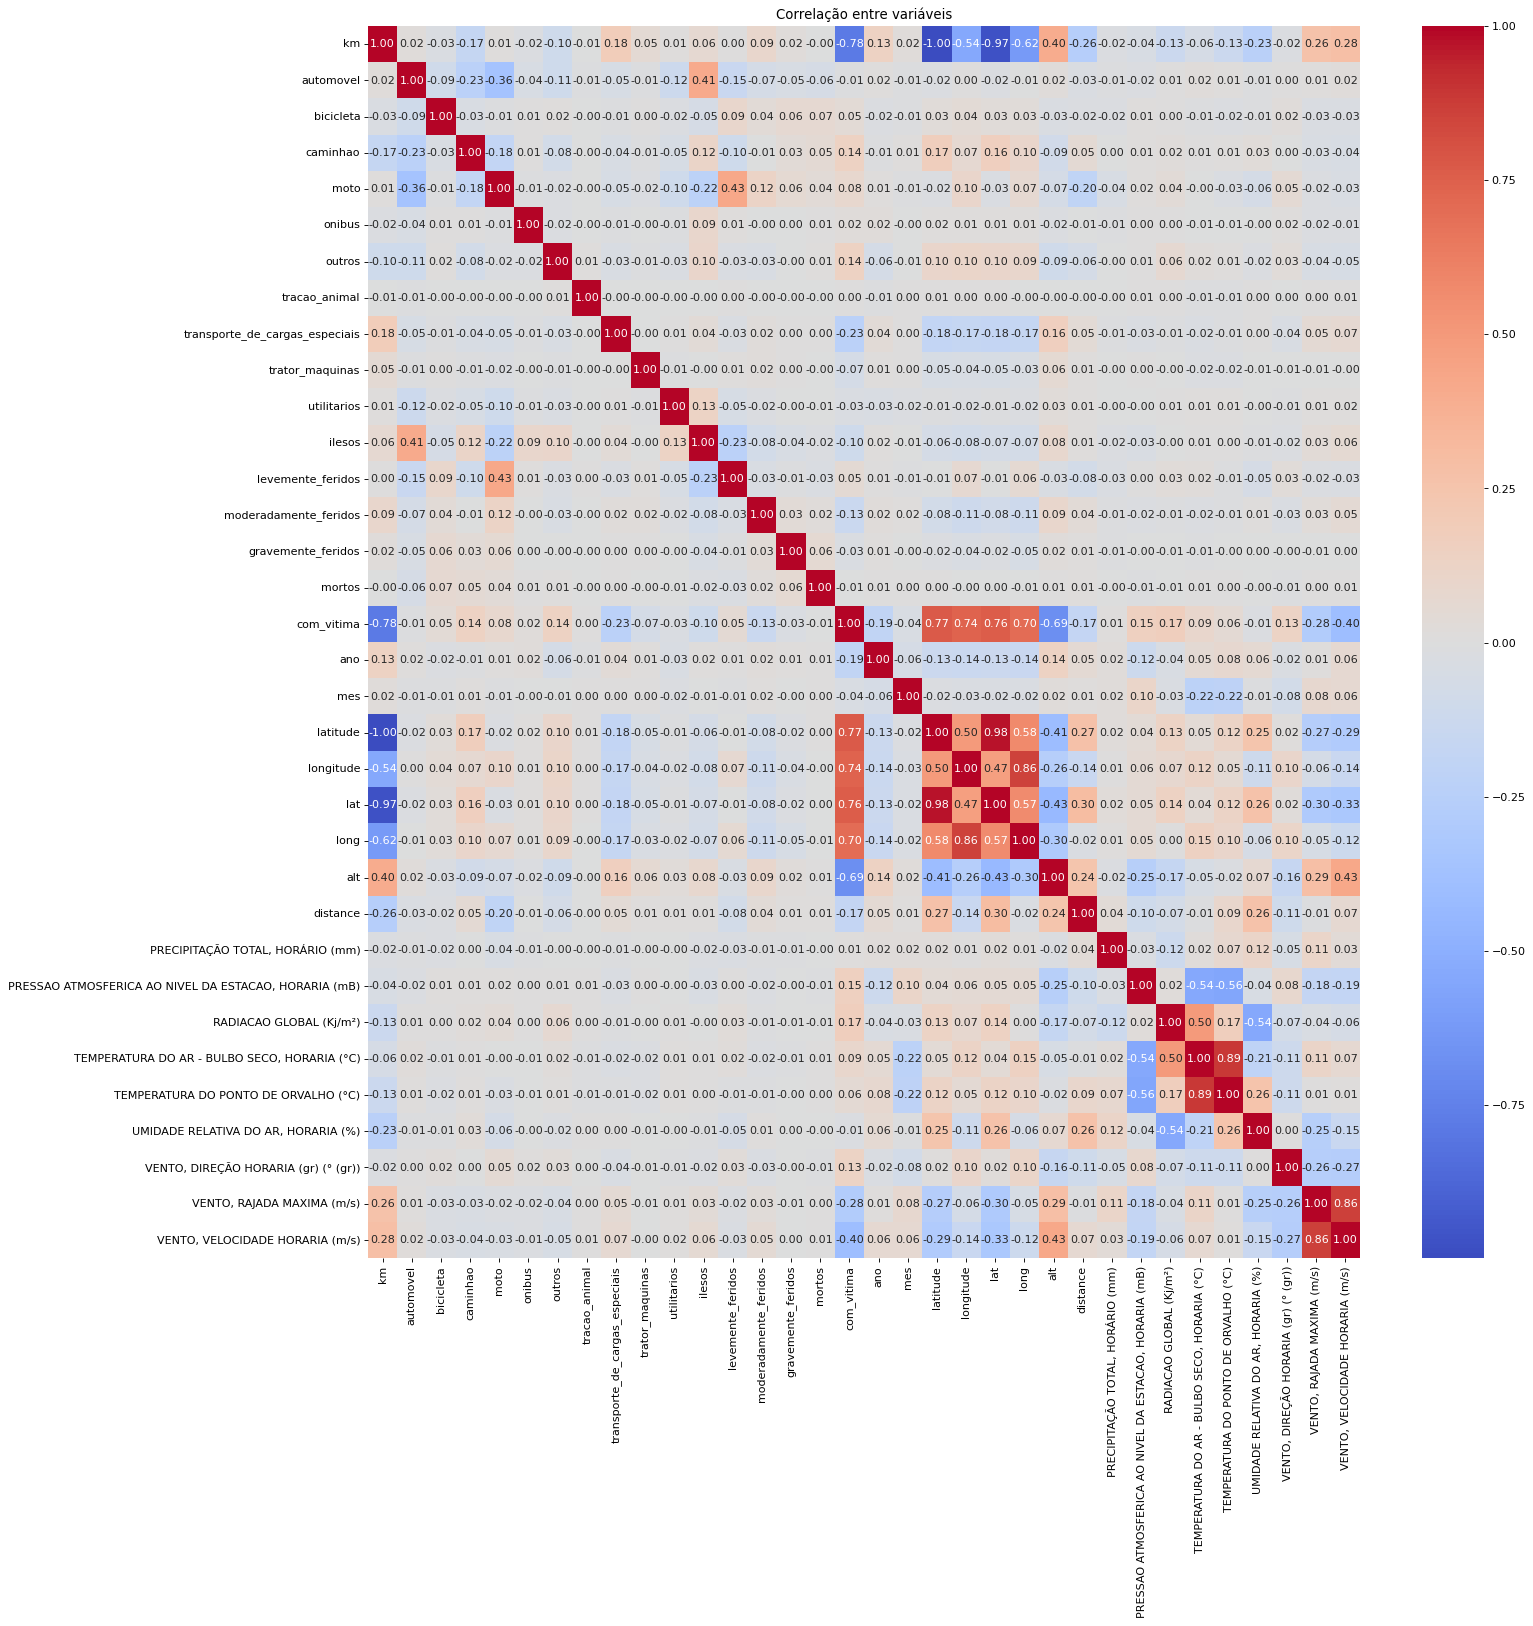

In [3]:
columns_to_select = [
    'km', 'automovel', 'bicicleta', 'caminhao', 'moto', 'onibus', 'outros',
    'tracao_animal', 'transporte_de_cargas_especiais', 'trator_maquinas', 'utilitarios',
    'ilesos', 'levemente_feridos', 'moderadamente_feridos', 'gravemente_feridos', 'mortos',
    'com_vitima', 'ano', 'mes', 'latitude', 'longitude', 'lat',
    'long', 'alt', 'distance', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
    'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)',
]

for col in columns_to_select:
    if col in acidentes_df.columns and acidentes_df[col].dtype == 'object' or ',' in acidentes_df[col].values:
        acidentes_df[col] = acidentes_df[col].str.replace(',', '.').astype(float)

selecao_df = acidentes_df[[col for col in columns_to_select if col in acidentes_df.columns]]

fig, ax = plt.subplots(figsize=(20, 20), dpi=80)

correlation = selecao_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=ax, fmt=".2f")
plt.title('Correlação entre variáveis')
fig.savefig('../output/correlacao_acidentes_clima.png')

In [4]:
pista_gdf = gpd.read_file('../data/DATA_FUSION/data/relevantes/BR-101-SC/pista_principal_br101sc.csv')
pista_gdf.head()

,concessionaria,ano_do_pnv_snv,rodovia,sentido,latitude,longitude,km,geometry
0,AUTOPISTA LITORAL SUL,2009,BR-101/SC,Crescente,-25.981624,-48.886367,0.0,None
1,AUTOPISTA LITORAL SUL,2009,BR-101/SC,Crescente,-25.98179,-48.88623,0.1,None
2,AUTOPISTA LITORAL SUL,2009,BR-101/SC,Crescente,-25.98257,-48.88572,0.2,None
3,AUTOPISTA LITORAL SUL,2009,BR-101/SC,Crescente,-25.98341,-48.88536,0.3,None
4,AUTOPISTA LITORAL SUL,2009,BR-101/SC,Crescente,-25.98428,-48.88514,0.4,None


In [5]:
relevante_df = acidentes_df[[
    'ilesos', 
    'levemente_feridos', 
    'moderadamente_feridos',
    'gravemente_feridos',
    'mortos', 
    'com_vitima',
    'ano',
    'mes',
    'latitude',
    'longitude',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'VENTO, VELOCIDADE HORARIA (m/s)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'Data'
    ]]


print(relevante_df.info())

for col in relevante_df.columns:
    if ',' in relevante_df[col].values:
        relevante_df[col] = relevante_df[col].str.replace(',', '.').astype(float)

print(relevante_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 59209 entries, 0 to 59212
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ilesos                                        59209 non-null  int64  
 1   levemente_feridos                             59209 non-null  int64  
 2   moderadamente_feridos                         59209 non-null  int64  
 3   gravemente_feridos                            59209 non-null  int64  
 4   mortos                                        59209 non-null  int64  
 5   com_vitima                                    59209 non-null  bool   
 6   ano                                           59209 non-null  int64  
 7   mes                                           59209 non-null  int64  
 8   latitude                                      59209 non-null  float64
 9   longitude                                     59209 non-null  floa

In [ ]:
precipitacao_latlog_df = relevante_df[['latitude', 'longitude', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'Data', 'ano', 'mes']] 
temperatura_latlog_df = relevante_df[['latitude', 'longitude', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'Data']]

acidentes_com_mortos_df = relevante_df[relevante_df['mortos'] > 0][['latitude', 'longitude', 'mortos', 'Data', 'ano', 'mes']]
acidentes_com_vitimas_gdf = gpd.GeoDataFrame(acidentes_com_mortos_df, geometry=gpd.points_from_xy(acidentes_com_mortos_df.longitude, acidentes_com_mortos_df.latitude))

/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


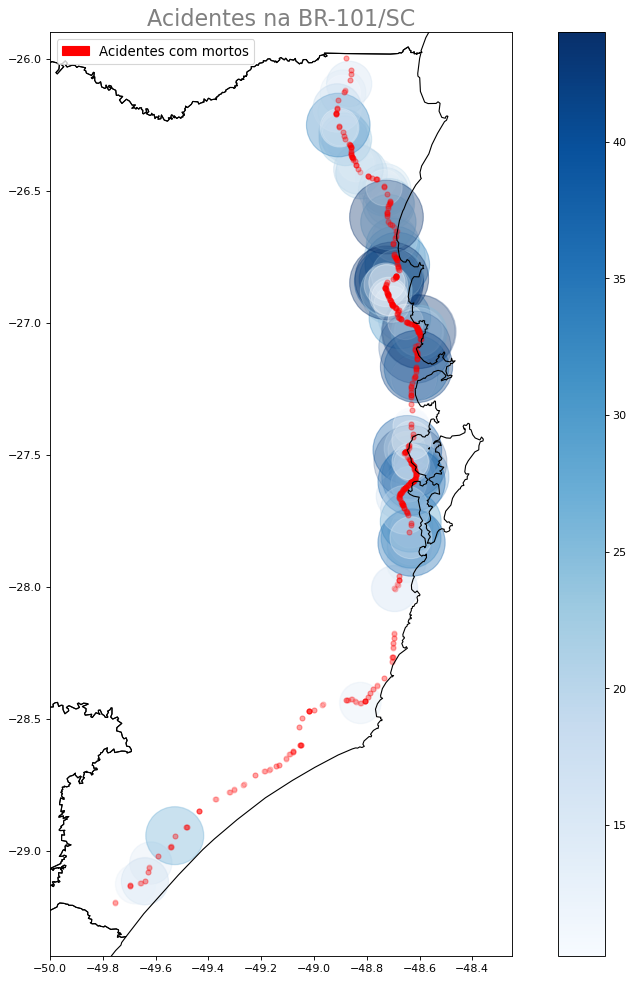

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
br_states = gpd.read_file(url)

fig, ax = plt.subplots(figsize=(15, 15), dpi=80)
br_states.boundary.plot(ax=ax, linewidth=1, color='black')  # Plota as bordas dos estados
br_states.plot(ax=ax, color='white')  # Plota os estados


acidentes_gdf = gpd.GeoDataFrame(precipitacao_latlog_df, geometry=gpd.points_from_xy(precipitacao_latlog_df.longitude, precipitacao_latlog_df.latitude))
acidentes_gdf = acidentes_gdf[acidentes_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] > 10]
acidentes_gdf.plot(column='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                             ax=ax,
                             legend=True,
                             cmap='Blues',
                             markersize=acidentes_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] * 100,
                             alpha=0.2)

acidentes_com_vitimas_gdf.plot(ax=ax, color='red', alpha=0.2, markersize=20, marker='o')

acidentes_patch = mpatches.Patch(color='red', label='Acidentes com mortos')
#pista_patch = mpatches.Patch(color='darkred', label='BR-101/SC')

plt.legend(handles=[acidentes_patch], fontsize=12, loc='best')

plt.ylim(-29.4, -25.9)
plt.xlim(-50, -48.25)
plt.title('Acidentes na BR-101/SC', fontsize=20, color='gray')
plt.show()

/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


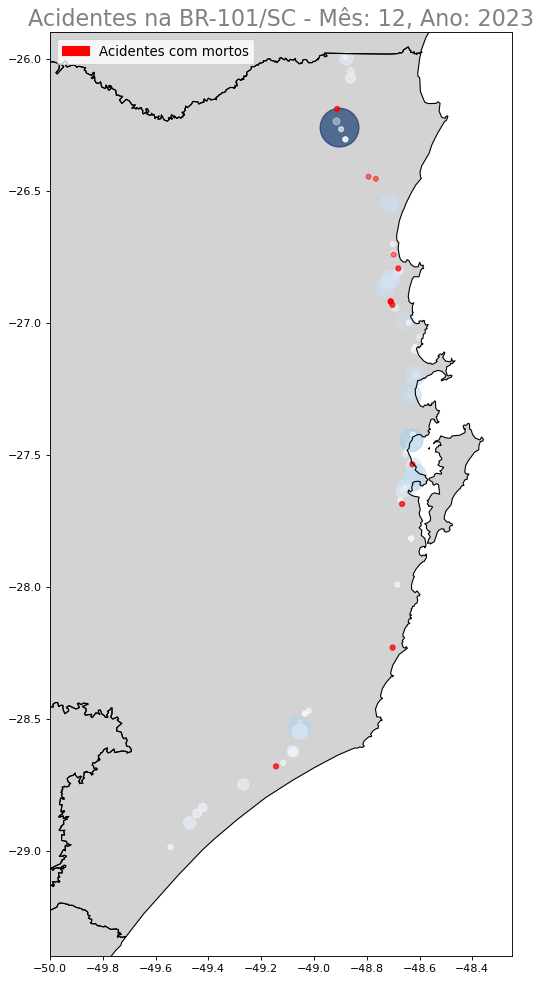

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation

# Configuração inicial
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
br_states = gpd.read_file(url)

# Convertendo DataFrames para GeoDataFrames
acidentes_gdf = gpd.GeoDataFrame(
    precipitacao_latlog_df, 
    geometry=gpd.points_from_xy(precipitacao_latlog_df.longitude, precipitacao_latlog_df.latitude)
).sort_values(['ano', 'mes'])
acidentes_com_vitimas_gdf = gpd.GeoDataFrame(
    acidentes_com_mortos_df, 
    geometry=gpd.points_from_xy(acidentes_com_mortos_df.longitude, acidentes_com_mortos_df.latitude)
).sort_values(['ano', 'mes'])

# Obtenha pares únicos de (mes, ano)
mes_ano_pares = acidentes_gdf[['mes', 'ano']].drop_duplicates().sort_values(['ano', 'mes']).to_records(index=False)

# Configurando o plot
fig, ax = plt.subplots(figsize=(15, 15), dpi=80)

def plot_frame(frame):
    ax.clear()
    
    # Extraindo mês e ano para o frame atual
    mes, ano = mes_ano_pares[frame]
    
    # Plotando os estados do Brasil
    br_states.boundary.plot(ax=ax, linewidth=1, color='black')  # Borda
    br_states.plot(ax=ax, color='lightgray')  # Interior
    
    # Filtrando dados para o mês e ano
    precipitacao_mes = acidentes_gdf[(acidentes_gdf['mes'] == mes) & (acidentes_gdf['ano'] == ano)]
    acidentes_mes = acidentes_com_vitimas_gdf[(acidentes_com_vitimas_gdf['mes'] == mes) & (acidentes_com_vitimas_gdf['ano'] == ano)]
    
    # Plotando precipitação
    if not precipitacao_mes.empty:
        precipitacao_mes = precipitacao_mes[precipitacao_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] > 0]
        precipitacao_mes.plot(
            column='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
            ax=ax,
            cmap='Blues',
            markersize=precipitacao_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] * 100,
            alpha=0.4
        )
    
    # Plotando acidentes
    if not acidentes_mes.empty:
        acidentes_mes.plot(
            ax=ax, 
            color='red', 
            alpha=0.5, 
            markersize=acidentes_mes['mortos'] * 20,  # Tamanho proporcional ao número de mortos
            marker='o'
        )
    
    # Adicionando legenda
    ax.legend(
        handles=[
            mpatches.Patch(color='red', label='Acidentes com mortos'),
        ],
        fontsize=12,
        loc='best'
    )
    
    # Configurações do gráfico
    plt.ylim(-29.4, -25.9)
    plt.xlim(-50, -48.25)
    plt.title(f'Acidentes na BR-101/SC - Mês: {mes}, Ano: {ano}', fontsize=20, color='gray')

# Criando a animação
frames = len(mes_ano_pares)
ani = FuncAnimation(fig, plot_frame, frames=frames, interval=1000, repeat=True)

# Salvar ou exibir a animação
from matplotlib.animation import PillowWriter
ani.save("animacao_acidentes_precipitacao.gif", writer=PillowWriter(fps=1))
plt.show()


/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/tmp/ipykernel_79168/3478206474.py:58: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  markersize=acidentes_mes.sum() * 20,  # Tamanho proporcional ao número de mortos


IndexError: list index out of range

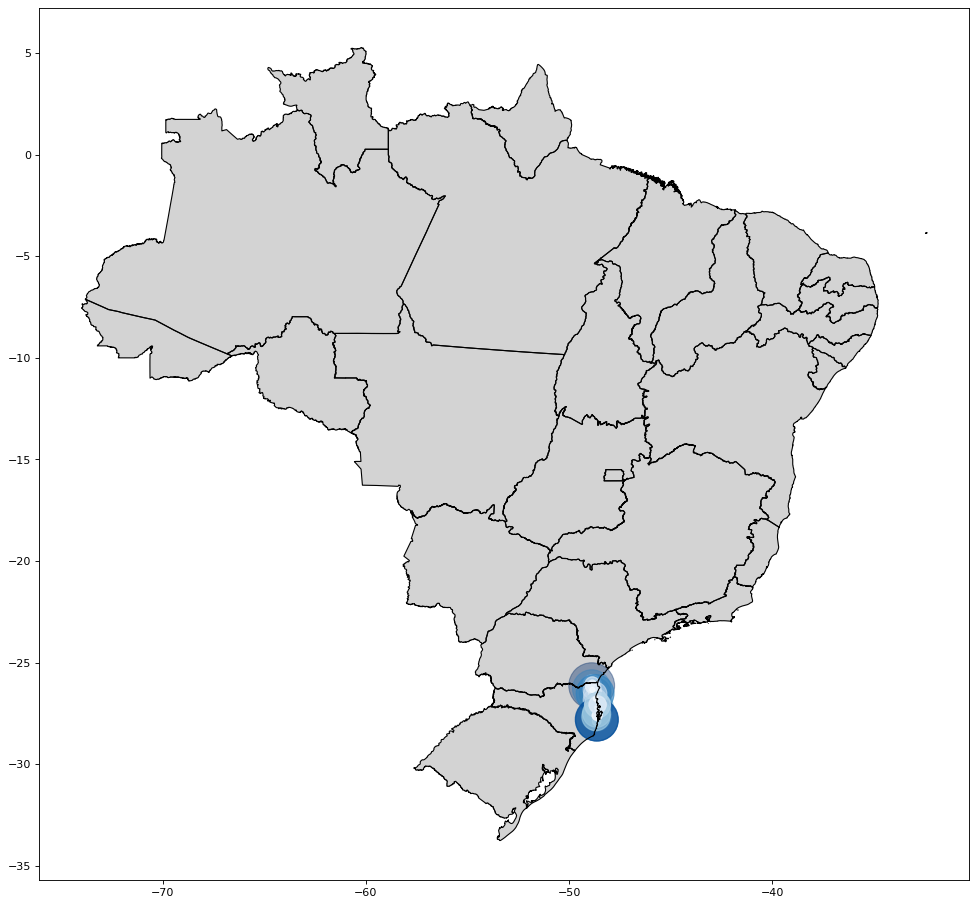

In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation

# Configuração inicial
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
br_states = gpd.read_file(url)

# Convertendo DataFrames para GeoDataFrames
acidentes_gdf = gpd.GeoDataFrame(
    precipitacao_latlog_df, 
    geometry=gpd.points_from_xy(precipitacao_latlog_df.longitude, precipitacao_latlog_df.latitude)
).sort_values(['ano', 'mes'])
acidentes_com_vitimas_gdf = gpd.GeoDataFrame(
    acidentes_com_mortos_df, 
    geometry=gpd.points_from_xy(acidentes_com_mortos_df.longitude, acidentes_com_mortos_df.latitude)
).sort_values(['ano', 'mes'])

# Obtenha pares únicos de (mes, ano)
mes_ano_pares = acidentes_gdf[['mes', 'ano']].drop_duplicates().sort_values(['ano', 'mes']).to_records(index=False)

# Configurando o plot
fig, ax = plt.subplots(figsize=(15, 15), dpi=80)

def plot_frame(frame):
    ax.clear()
    
    # Extraindo mês e ano para o frame atual
    mes, ano = mes_ano_pares[frame]
    
    # Plotando os estados do Brasil
    br_states.boundary.plot(ax=ax, linewidth=1, color='black')  # Borda
    br_states.plot(ax=ax, color='lightgray')  # Interior
    
    # Filtrando dados para o mês e ano
    precipitacao_mes = acidentes_gdf[(acidentes_gdf['mes'] == mes) & (acidentes_gdf['ano'] == ano)]
    acidentes_mes = acidentes_com_vitimas_gdf[(acidentes_com_vitimas_gdf['mes'] == mes) & (acidentes_com_vitimas_gdf['ano'] == ano)]
    
    # Plotando precipitação
    if not precipitacao_mes.empty:
        precipitacao_mes = precipitacao_mes[precipitacao_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] > 0]
        precipitacao_mes.plot(
            column='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
            ax=ax,
            cmap='Blues',
            markersize=precipitacao_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] * 100,
            alpha=0.4
        )
    
    # Plotando acidentes
    if not acidentes_mes.empty:
        acidentes_mes.plot(
            ax=ax, 
            color='red', 
            alpha=0.5, 
            markersize=acidentes_mes.sum() * 20,  # Tamanho proporcional ao número de mortos
            marker='o'
        )
    
    # Adicionando legenda
    ax.legend(
        handles=[
            mpatches.Patch(color='red', label='Acidentes com mortos'),
        ],
        fontsize=12,
        loc='best'
    )
    
    # Configurações do gráfico
    plt.ylim(-29.4, -25.9)
    plt.xlim(-50, -48.25)
    plt.title(f'Acidentes na BR-101/SC - Mês: {mes}, Ano: {ano}', fontsize=20, color='gray')

# Criando a animação
frames = len(mes_ano_pares)
ani = FuncAnimation(fig, plot_frame, frames=frames, interval=1000, repeat=True)

# Salvar ou exibir a animação
from matplotlib.animation import PillowWriter
ani.save("animacao_acidentes_precipitacao.gif", writer=PillowWriter(fps=1))
plt.show()
